PCA - 
*dimensionality reduction(n to k)

1.   Preprocessing(Normalization)
2.   Covariance matrix
1.   svd singular value decomposition - returns u,s,v. u is the matrix of eigen vectors(nXn shape, slice it to first k values)
2.   Projection (zi = Ured.T*xi)

In [ ]:
from keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

0


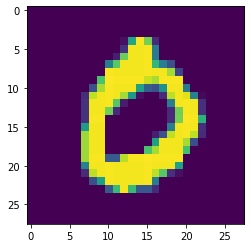

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_test[3])
print(y_test[3])

In [9]:
x = x_test.reshape((-1,28*28))
y = y_test

In [10]:
x.shape

(10000, 784)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()
x_ = sc.fit_transform(x)

In [13]:
x_.shape

(10000, 784)

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2)

In [16]:
z_pca = pca.fit_transform(x_)

In [17]:
z_pca.shape

(10000, 2)

In [18]:
pca.explained_variance_

array([41.39893395, 28.35105803])

it means around 70%(sum of above two) of data was retained and 30% was lost.

In [19]:
import numpy as np

In [20]:
covar = np.dot(x_.T,x_)

In [21]:
from numpy.linalg import svd

In [22]:
svd?

In [23]:
u,s,v = svd(covar)

In [24]:
u_red = u[:,:2]

In [25]:
z = np.dot(x_,u_red)

In [26]:
z.shape

(10000, 2)

In [27]:
import pandas as pd

In [29]:
new_data = np.hstack((z,y.reshape((-1,1))))

In [30]:
dataframe = pd.DataFrame(new_data,columns= ['PC1','PC2','digit'])

In [31]:
import seaborn as sns

<Figure size 1080x1080 with 0 Axes>

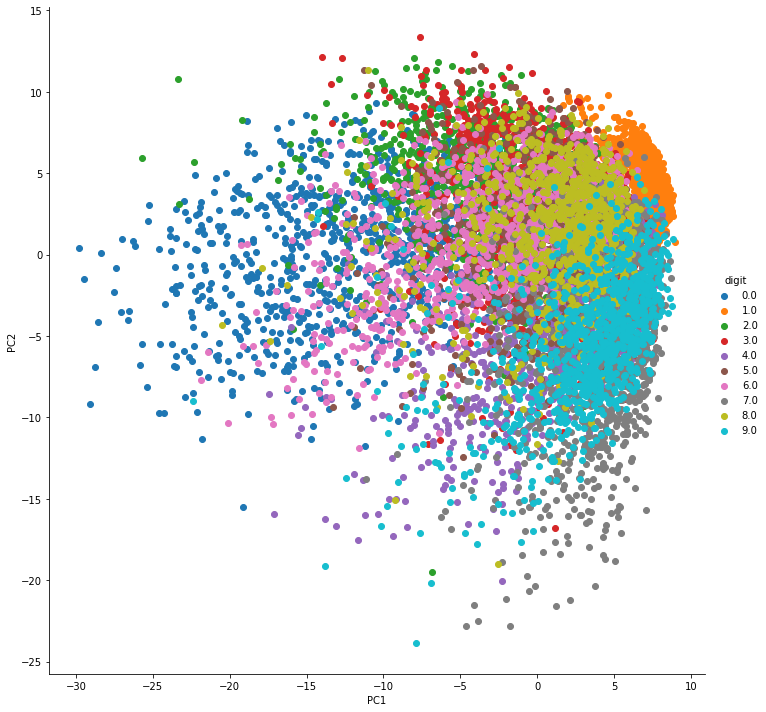

In [32]:
plt.figure(figsize=(15,15))
fig = sns.FacetGrid(dataframe,hue='digit',height=10)
fig.map(plt.scatter,'PC1','PC2')
fig.add_legend()
plt.show()

In [33]:
pca = PCA()
znew = pca.fit_transform(x_)

In [35]:
arr = pca.explained_variance_
sum(arr)

668.0668066806687

In [36]:
cum_var_explained = np.cumsum(pca.explained_variance_ratio_)

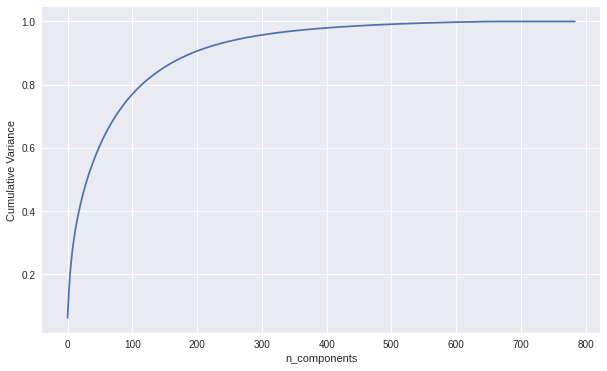

In [39]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn')
plt.plot(cum_var_explained)
plt.xlabel('n_components')
plt.ylabel('Cumulative Variance')
plt.show()

we can get around 95% accurate variance if we reduce to 300 components. Our components would be reduced and variance won't be affected much.